In [7]:
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, CenteredNorm
import numpy as np
from copy import deepcopy
from pprint import pprint
from pyHalo.preset_models import preset_model_from_name

import mejiro
plt.style.use(os.path.join(mejiro.__path__[0], 'mejiro.mplstyle'))
from mejiro.analysis import stats
from mejiro.exposure import Exposure
from mejiro.instruments.jwst import JWST
from mejiro.instruments.hwo import HWO
from mejiro.galaxy_galaxy import Sample1, Sample2, SampleGG
from mejiro.synthetic_image import SyntheticImage
from mejiro.utils import lenstronomy_util
from mejiro.engines.galsim_engine import GalSimEngine
from mejiro.engines.stpsf_engine import STPSFEngine

In [8]:
strong_lens = Sample1()

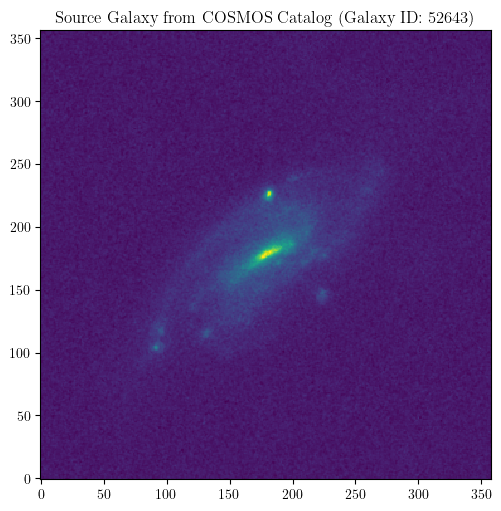

In [9]:
plt.imshow(strong_lens.kwargs_source[0]['image'])
plt.title(f'Source Galaxy from COSMOS Catalog (Galaxy ID: {strong_lens.physical_params["galaxy_id"]})')
plt.show()

Scene size: 5.001921551492087 arcsec, 291 pixels at pixel scale 0.017188733853924696 arcsec/pix
Synthetic image calculation time: 1.883 s


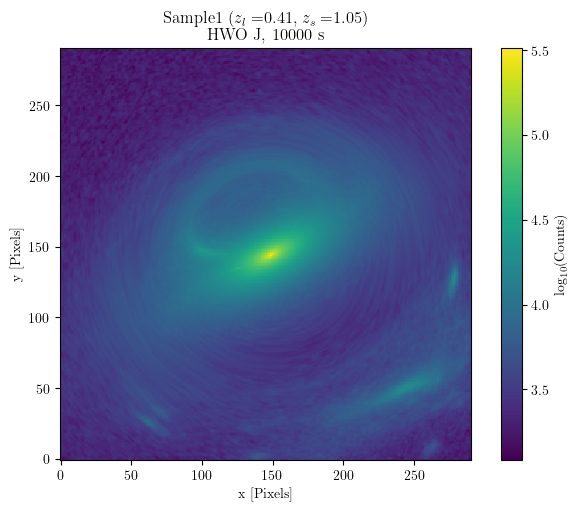

In [19]:
synthetic_image = SyntheticImage(strong_lens,
                                 instrument=HWO(),
                                 band='J',
                                 fov_arcsec=5,
                                #  instrument_params=instrument_params,
                                #  kwargs_numerics=kwargs_numerics,
                                #  kwargs_psf=kwargs_psf,
                                 pieces=True,
                                 verbose=True)

exposure = Exposure(synthetic_image,
                        exposure_time=10000,
                        verbose=False)

exposure.plot()

Scene size: 5.001921551492087 arcsec, 291 pixels at pixel scale 0.017188733853924696 arcsec/pix
Synthetic image calculation time: 30.838 s


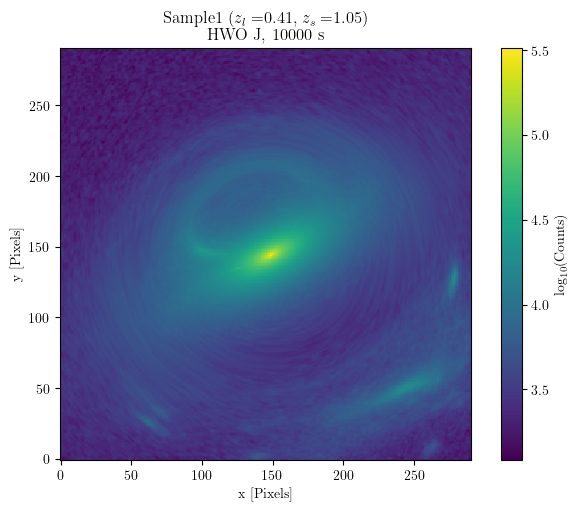

In [21]:
strong_lens_with_substructure = deepcopy(strong_lens)
CDM = preset_model_from_name('CDM')
realization = CDM(round(strong_lens_with_substructure.z_lens, 2), round(strong_lens_with_substructure.z_source, 2), cone_opening_angle_arcsec=5, log_m_host=np.log10(strong_lens_with_substructure.get_main_halo_mass()))
strong_lens_with_substructure.add_realization(realization, add_mass_sheet_correction=True)

synthetic_image_with_substructure = SyntheticImage(strong_lens_with_substructure,
                                 instrument=HWO(),
                                 band='J',
                                 fov_arcsec=5,
                                #  instrument_params=instrument_params,
                                #  kwargs_numerics=kwargs_numerics,
                                #  kwargs_psf=kwargs_psf,
                                 pieces=True,
                                 verbose=True)

exposure_with_substructure = Exposure(synthetic_image_with_substructure,
                        exposure_time=10000,
                        verbose=False)

exposure.plot()

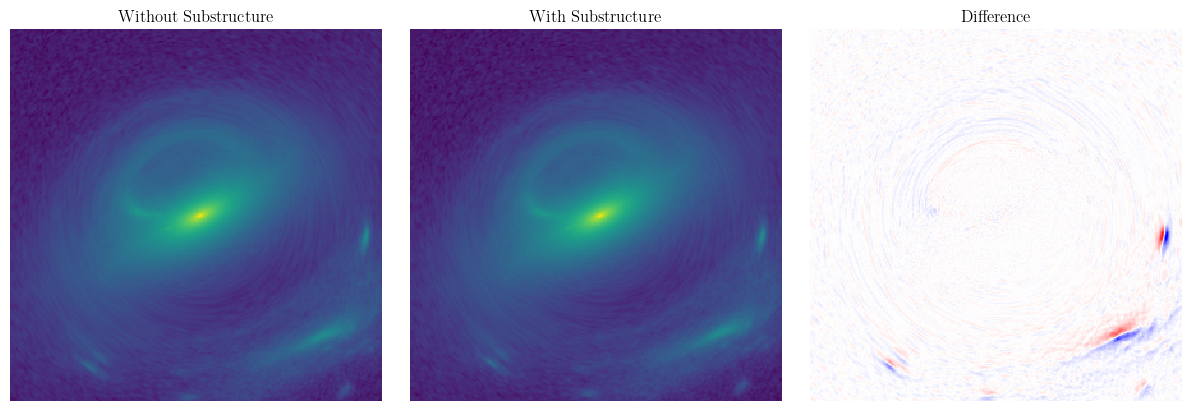

In [22]:
_, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(exposure.exposure, norm=LogNorm())
ax[0].set_title('Without Substructure')
ax[0].axis('off')

ax[1].imshow(exposure_with_substructure.exposure, norm=LogNorm())
ax[1].set_title('With Substructure')
ax[1].axis('off')

ax[2].imshow(exposure_with_substructure.exposure - exposure.exposure, norm=CenteredNorm(), cmap='bwr')
ax[2].set_title('Difference')
ax[2].axis('off')

plt.show()